# Anomaly Detection Examples with Time Series Data by Singular Spectrum Transformation

井出剛著「入門 機械学習による異常検知〜Rによる実践ガイド」P203-205 の例

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib

%matplotlib inline

### データ生成

In [2]:
np.random.seed(1)
x1 = np.arange(0, 10, 0.1)
x2 = np.arange(10, 20, 0.1)
x3 = np.arange(20, 30, 0.1)
y1 = np.sin(np.pi * x1) + np.random.normal(0, 0.07, len(x1))
y2 = np.sin(2 * np.pi * x2) + np.random.normal(0, 0.07, len(x2))
y3 = np.sin(np.pi * x3) + np.random.normal(0, 0.07, len(x3))
xi = np.concatenate([y1, y2, y3])

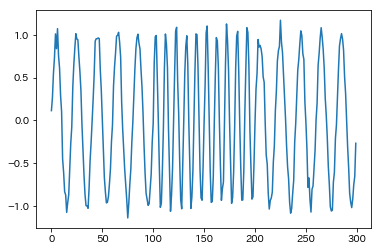

In [3]:
plt.plot(xi)
plt.show()

### 特異スペクトル変換法

In [4]:
w = 10
m = 2
k = 10
l = 5
tt = len(xi)
score = np.zeros(tt)

In [5]:
def embed(lst, dim):
    emb = np.empty((0,dim), float)
    for i in range(lst.size - dim + 1):
        rindex = np.arange(i+dim-1, i-1, -1)
        tmp = np.array(lst[rindex]).reshape((1,-1))
        emb = np.append( emb, tmp, axis=0)
    return emb

In [6]:
for t in range(w+k, tt-l+2):
    tstart = t - w - k
    tend = t - 1
    x1 = embed(xi[tstart:tend], w)
    x1 = x1.T[::-1,:]
    x2 = embed(xi[tstart + l:tend + l], w)
    x2 = x2.T[::-1,:]
    
    u1, _, _ = np.linalg.svd(x1, full_matrices=True)
    u2, _, _ = np.linalg.svd(x2, full_matrices=True)
    u1 = u1[:,0:m]
    u2 = u2[:,0:m]
    _, s, _ = np.linalg.svd(u1.T.dot(u2), full_matrices=True)
    
    sig1 = s[0]
    score[t] = 1 - sig1**2
    

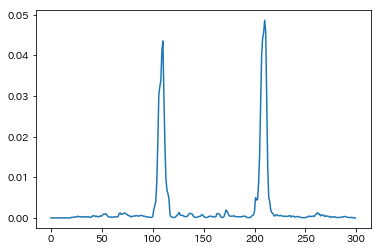

In [7]:
plt.plot(score)
plt.show()